In [41]:
import os

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.diagnostic import linear_rainbow, het_breuschpagan
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.preprocessing import LabelEncoder
import pickle

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [42]:
df=pd.read_csv('../../data/processed/merged_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82318 entries, 0 to 82317
Data columns (total 41 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   SalePrice           82318 non-null  int64 
 1   Township            82318 non-null  int64 
 2   Area                82318 non-null  int64 
 3   SqFtLot             82318 non-null  int64 
 4   PcntUnusable        82318 non-null  int64 
 5   WfntFootage         82318 non-null  int64 
 6   WfntAccessRights    82318 non-null  object
 7   TidelandShoreland   82318 non-null  int64 
 8   TrafficNoise        82318 non-null  int64 
 9   AirportNoise        82318 non-null  int64 
 10  AdjacentGreenbelt   82318 non-null  object
 11  BldgGrade           82318 non-null  int64 
 12  SqFtUnfinFull       82318 non-null  int64 
 13  SqFtUnfinHalf       82318 non-null  int64 
 14  SqFtTotLiving       82318 non-null  int64 
 15  SqFtTotBasement     82318 non-null  int64 
 16  SqFtFinBasement     82

In [43]:
df.head()

,SalePrice,Township,Area,SqFtLot,PcntUnusable,WfntFootage,WfntAccessRights,TidelandShoreland,TrafficNoise,AirportNoise,AdjacentGreenbelt,BldgGrade,SqFtUnfinFull,SqFtUnfinHalf,SqFtTotLiving,SqFtTotBasement,SqFtFinBasement,FinBasementGrade,SqFtGarageBasement,SqFtGarageAttached,DaylightBasement,SqFtOpenPorch,SqFtEnclosedPorch,SqFtDeck,HeatSystem,HeatSource,BrickStone,Bedrooms,BathHalfCount,Bath3qtrCount,BathFullCount,FpSingleStory,FpMultiStory,FpFreestanding,FpAdditional,YrBuilt,YrRenovated,PcntComplete,Condition,AddnlCost,SaleWarning
0,847888,25,35,7424,0,0,N,0,0,0,N,8,0,0,2200,0,0,0,0,460,N,0,0,0,5,2,0,4,1,1,1,0,1,0,0,1987,0,0,3,0,
1,819000,25,19,5000,0,0,N,0,0,0,N,7,0,0,1800,990,990,7,0,0,N,180,0,120,5,2,0,2,1,0,1,0,1,0,0,1923,0,0,4,0,
2,875000,25,44,3600,0,0,N,0,0,0,N,8,0,0,1890,750,0,0,220,0,,190,0,0,5,1,0,4,0,0,1,0,1,0,0,1919,0,0,3,0,
3,249950,26,7,7750,0,0,N,0,1,0,N,8,0,0,3340,2180,960,8,750,0,,250,0,0,5,2,0,5,1,1,2,2,0,0,0,2019,0,58,3,5000,10
4,780000,23,66,36154,0,1,N,0,0,0,N,8,0,0,2660,310,310,7,0,530,Y,170,0,100,5,3,0,3,1,1,1,0,1,1,0,1985,0,0,4,0,


In [44]:
# Checking for correlation.

In [45]:
corr = np.abs(df.corr())

In [46]:
corr = corr.sort_values('SalePrice', ascending=False)

In [47]:
# Including mask for readibility.

In [48]:
mask = np.triu(np.ones_like(corr, dtype=np.bool))

In [49]:
# Creating correlogram to display correlation data.

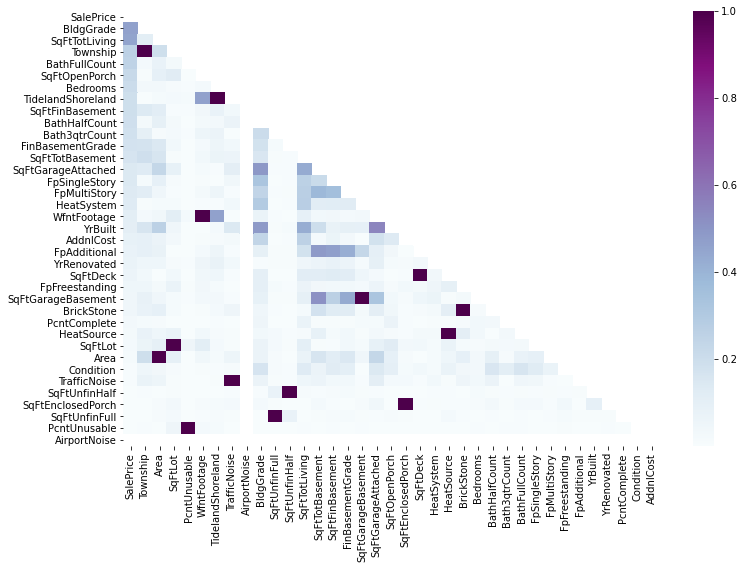

In [50]:
fig1, ax1 = plt.subplots(figsize=(12,8))
sns.heatmap(corr, mask=mask, ax=ax1, cmap="BuPu");

In [51]:
# Investigating linearity 

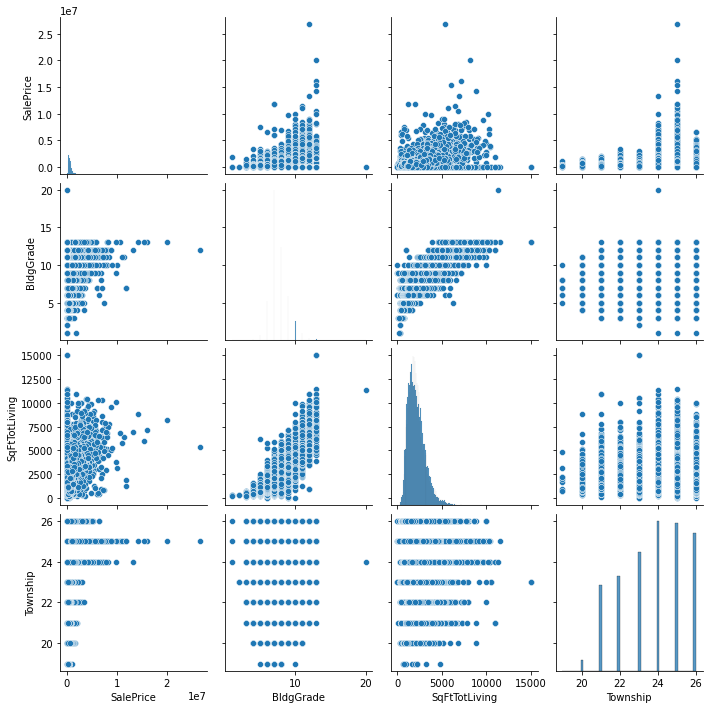

In [52]:
pos_cor_cols = ['SalePrice','BldgGrade','SqFtTotLiving','Township']
pos_cor_cols_df = df[pos_cor_cols]
sns.pairplot(pos_cor_cols_df)
plt.show()

Visually, the data does not appear to be linear. The analysis also shows that highly correlated data is categorical in nature as the case with Township and Building grade. Futher data processing is required for SalePrice and SqFtTotLiving.

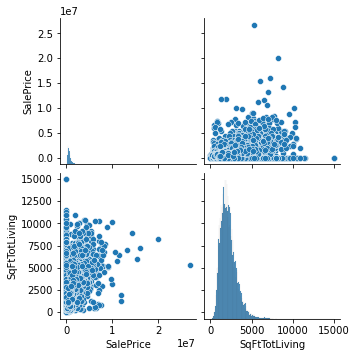

In [53]:
pos_cor_cols = ['SalePrice','SqFtTotLiving']
pos_cor_cols_df = df[pos_cor_cols]
sns.pairplot(pos_cor_cols_df)
plt.show()

In [11]:
# Investigating normality

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


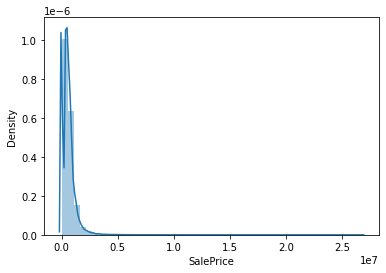

In [12]:
sns.distplot(df.SalePrice);

Originally, there were some outliers that produced a very long tail. Those outliers were removed using the zscore within 2 std and by using the boxplot to remove remaining outliers.

In [13]:
# Checking for outliers

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SalePrice'>

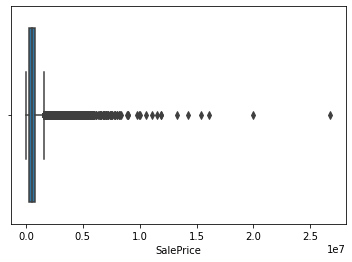

In [14]:
sns.boxplot(df['SalePrice'])

In [15]:
# Removing outliers (keep only data within 1 stds)

In [16]:
df['zscore'] = (df.SalePrice - df.SalePrice.mean() ) / df.SalePrice.std()
df.head()

,SalePrice,Township,Area,SqFtLot,PcntUnusable,WfntFootage,WfntAccessRights,TidelandShoreland,TrafficNoise,AirportNoise,AdjacentGreenbelt,BldgGrade,SqFtUnfinFull,SqFtUnfinHalf,SqFtTotLiving,SqFtTotBasement,SqFtFinBasement,FinBasementGrade,SqFtGarageBasement,SqFtGarageAttached,DaylightBasement,SqFtOpenPorch,SqFtEnclosedPorch,SqFtDeck,HeatSystem,HeatSource,BrickStone,Bedrooms,BathHalfCount,Bath3qtrCount,BathFullCount,FpSingleStory,FpMultiStory,FpFreestanding,FpAdditional,YrBuilt,YrRenovated,PcntComplete,Condition,AddnlCost,SaleWarning,zscore
0,847888,25,35,7424,0,0,N,0,0,0,N,8,0,0,2200,0,0,0,0,460,N,0,0,0,5,2,0,4,1,1,1,0,1,0,0,1987,0,0,3,0,,0.446400
1,819000,25,19,5000,0,0,N,0,0,0,N,7,0,0,1800,990,990,7,0,0,N,180,0,120,5,2,0,2,1,0,1,0,1,0,0,1923,0,0,4,0,,0.397945
2,875000,25,44,3600,0,0,N,0,0,0,N,8,0,0,1890,750,0,0,220,0,,190,0,0,5,1,0,4,0,0,1,0,1,0,0,1919,0,0,3,0,,0.491875
3,249950,26,7,7750,0,0,N,0,1,0,N,8,0,0,3340,2180,960,8,750,0,,250,0,0,5,2,0,5,1,1,2,2,0,0,0,2019,0,58,3,5000,10,-0.556533
4,780000,23,66,36154,0,1,N,0,0,0,N,8,0,0,2660,310,310,7,0,530,Y,170,0,100,5,3,0,3,1,1,1,0,1,1,0,1985,0,0,4,0,,0.332530


In [17]:
df = df[(df.zscore>-1) & (df.zscore<1)]

In [18]:
df = df[(df.SalePrice>0)&(df.SalePrice<1400000)]

In [19]:
import numpy as np
df.SalePrice = np.log(df.SalePrice)

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


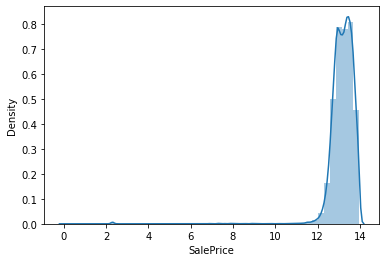

In [20]:
sns.distplot(df.SalePrice);

In [21]:
#building grade, Sqft Total living, **Heating system*** (Bedrooms), BathHalfCount, (Poarches), Basement

In [23]:
# Testing for linearity

In [25]:
fsm_df = df[["SalePrice", "SqFtTotLiving"]].copy()
fsm_df.dropna(inplace=True)

In [26]:
fsm = ols(formula="SalePrice ~ SqFtTotLiving", data = fsm_df)
fsm_results = fsm.fit()

In [27]:
rainbow_statistic, rainbow_p_value = linear_rainbow(fsm_results)
print("Rainbow statistic:", rainbow_statistic)
print("Rainbow p-value:",rainbow_p_value)

Rainbow statistic: 0.8344299548149338
Rainbow p-value: 0.9999999999999999


In [28]:
fsm_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.089
Model:                            OLS   Adj. R-squared:                  0.089
Method:                 Least Squares   F-statistic:                     5509.
Date:                Fri, 26 Mar 2021   Prob (F-statistic):               0.00
Time:                        13:45:11   Log-Likelihood:                -50157.
No. Observations:               56074   AIC:                         1.003e+05
Df Residuals:                   56072   BIC:                         1.003e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        12.7134      0.007   1856.108      0.000      12.700      12.727
SqFtTotLiving     0.0002    3.2e-06     74.220      0.000       0.000       0.000
==============================================================================
Omnibus:                    85757.941   Durbin-Watson:                   1.873
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         60125373.559
Skew:                          -9.532   Prob(JB):                         0.00
Kurtosis:                     162.281   Cond. No.                     5.87e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.87e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [29]:
# check the assum. manually for at least 3 hand created models.
# This will help you see if you need to cleanup data.
# 